# **Do Neonic Pesticides Impact Honey Production?**

## **By: Lindsay Gills**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# import data
honey_df = pd.read_excel(r"C:\Users\linds\OneDrive\Documents\honeydatasetcleanedfinal2copy.xlsx")

In [5]:
# dataset was cleaned through excel
honey_df.head()

,state,numcol,yieldpercol(lbs),totalprod(lbs),stocks(lbs),priceperlb,prodvalue,year,statename,region,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nTHIAMETHOXAM(kg),nACETAMIPRID(kg),nTHIACLOPRID(kg),nAllNeonic(kg)
0,AL,16000,71,1136000,159000,0.72,818000,1998,Alabama,South,0.0,1836.3,0.0,0.0,0.0,1836.3
1,AL,17000,68,1156000,185000,0.56,647000,1999,Alabama,South,0.0,1251.2,0.0,0.0,0.0,1251.2
2,AL,16000,78,1248000,187000,0.59,736000,2000,Alabama,South,0.0,1499.2,0.0,0.0,0.0,1499.2
3,AL,14000,73,1022000,235000,0.72,736000,2001,Alabama,South,0.0,1490.8,0.0,0.0,0.0,1490.8
4,AL,12000,86,1032000,103000,1.18,1218000,2002,Alabama,South,0.0,1178.8,840.4,0.0,0.0,2019.2


In [7]:
honey_df.tail()

,state,numcol,yieldpercol(lbs),totalprod(lbs),stocks(lbs),priceperlb,prodvalue,year,statename,region,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nTHIAMETHOXAM(kg),nACETAMIPRID(kg),nTHIACLOPRID(kg),nAllNeonic(kg)
756,WY,50000,51,2550000,459000,1.87,4769000,2012,Wyoming,West,1174.9,277.0,423.3,0.0,0.0,1875.2
757,WY,47000,66,3102000,558000,2.11,6545000,2013,Wyoming,West,840.9,155.9,526.2,0.0,0.0,1523.0
758,WY,38000,61,2318000,255000,2.08,4821000,2014,Wyoming,West,1262.0,258.2,566.1,0.0,0.0,2086.3
759,WY,38000,77,2926000,146000,1.90,5559000,2015,Wyoming,West,0.0,114.4,19.0,0.0,0.0,133.4
760,WY,40000,68,2720000,190000,1.78,4842000,2016,Wyoming,West,0.0,27.5,9.4,0.0,0.0,36.9


In [9]:
# summary statistics
honey_df.describe()

,numcol,yieldpercol(lbs),totalprod(lbs),stocks(lbs),priceperlb,prodvalue,year,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nTHIAMETHOXAM(kg),nACETAMIPRID(kg),nTHIACLOPRID(kg),nAllNeonic(kg)
count,761.000000,761.000000,7.610000e+02,7.610000e+02,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,62858.081472,59.724047,4.226796e+06,1.289880e+06,1.688594,5.576555e+06,2006.752957,10890.929304,10019.377661,6225.054008,729.025887,120.468988,27984.855848
std,93358.834279,18.547097,6.965583e+06,2.237819e+06,0.931687,9.529811e+06,5.458884,29821.711174,17234.345485,10237.763659,2574.475379,464.478136,50127.112520
min,2000.000000,19.000000,8.400000e+04,8.000000e+03,0.490000,1.620000e+05,1998.000000,0.000000,3.200000,0.000000,0.000000,0.000000,3.200000
25%,9000.000000,46.000000,4.620000e+05,1.210000e+05,1.040000,8.920000e+05,2002.000000,0.000000,937.500000,29.700000,0.000000,0.000000,1631.800000
50%,27000.000000,57.000000,1.581000e+06,4.330000e+05,1.470000,2.122000e+06,2007.000000,336.700000,3698.900000,1156.300000,16.000000,0.000000,8402.100000
75%,65000.000000,70.000000,4.200000e+06,1.436000e+06,2.040000,5.599000e+06,2011.000000,6569.300000,10588.600000,7777.000000,349.100000,0.000000,33508.200000
max,510000.000000,128.000000,4.641000e+07,1.380000e+07,7.090000,8.385900e+07,2016.000000,278498.800000,150569.300000,64834.600000,36480.300000,4273.200000,403011.600000


In [11]:
# data information
honey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              761 non-null    object 
 1   numcol             761 non-null    int64  
 2   yieldpercol(lbs)   761 non-null    int64  
 3   totalprod(lbs)     761 non-null    int64  
 4   stocks(lbs)        761 non-null    int64  
 5   priceperlb         761 non-null    float64
 6   prodvalue          761 non-null    int64  
 7   year               761 non-null    int64  
 8   statename          761 non-null    object 
 9   region             761 non-null    object 
 10  nCLOTHIANIDIN(kg)  761 non-null    float64
 11  nIMIDACLOPRID(kg)  761 non-null    float64
 12  nTHIAMETHOXAM(kg)  761 non-null    float64
 13  nACETAMIPRID(kg)   761 non-null    float64
 14  nTHIACLOPRID(kg)   761 non-null    float64
 15  nAllNeonic(kg)     761 non-null    float64
dtypes: float64(7), int64(6), o

### **Honey and Pesticide Pivot Tables**

In [13]:
# Honey Amount by State Pivot Table
pivot_honey_amount_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'totalprod(lbs)', aggfunc = 'sum')
pivot_honey_amount_by_state_df_descending_order = pivot_honey_amount_by_state_df.sort_values(by = 'totalprod(lbs)', ascending = False) 
pivot_honey_amount_by_state_df_descending_order

,totalprod(lbs)
state,
ND,624435000
CA,379155000
SD,344361000
FL,297798000
MT,210125000
MN,175432000
TX,137832000
WI,95067000
MI,93788000


In [15]:
# Honey Amount By Region Pivot Table 
pivot_honey_amount_by_region_df = pd.pivot_table(honey_df, index = 'region', values = 'totalprod(lbs)', aggfunc = 'sum')
pivot_honey_amount_by_region_df_descending_order = pivot_honey_amount_by_region_df.sort_values('totalprod(lbs)', ascending = False)
pivot_honey_amount_by_region_df_descending_order

,totalprod(lbs)
region,
Midwest,1494247000
West,909541000
South,698445000
Northeast,114359000


In [21]:
# Honey Price by State Pivot Table
pivot_honey_price_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'prodvalue', aggfunc = 'sum')
pivot_honey_price_by_state_df_descending_order = pivot_honey_price_by_state_df.sort_values(by = 'prodvalue', ascending = False)
pivot_honey_price_by_state_df_descending_order

,prodvalue
state,
ND,832320000
SD,441289000
CA,430825000
FL,356575000
MT,283114000
MN,216799000
TX,181668000
MI,136570000
WI,130348000


In [23]:
# Honey Price by Region Pivot Table
pivot_honey_price_by_region_df = pd.pivot_table(honey_df, index = 'region', values = 'prodvalue', aggfunc = 'sum')
pivot_honey_price_by_region_df_descending_order = pivot_honey_price_by_region_df.sort_values(by = 'prodvalue', ascending = False)
pivot_honey_price_by_region_df_descending_order

,prodvalue
region,
Midwest,2001026000
West,1135860000
South,916875000
Northeast,189997000


In [25]:
# Pesticide by State Pivot Table
pivot_pesticide_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'nAllNeonic(kg)', aggfunc = 'sum')
pivot_pesticide_by_state_df_descending_order = pivot_pesticide_by_state_df.sort_values(by = 'nAllNeonic(kg)', ascending = False)
pivot_pesticide_by_state_df_descending_order

,nAllNeonic(kg)
state,
IL,1978260.1
IA,1973928.9
CA,1852880.2
MN,1276847.6
NE,1230729.4
IN,1134514.0
TX,1130917.8
SD,834245.8
MO,752220.3


In [27]:
# Pesticide by Region Pivot Table
pivot_pesticide_by_region_df = pd.pivot_table(honey_df, index = 'region', values = 'nAllNeonic(kg)', aggfunc = 'sum')
pivot_pesticide_by_region_df_descending_order = pivot_pesticide_by_region_df.sort_values(by = 'nAllNeonic(kg)', ascending = False)
pivot_pesticide_by_region_df_descending_order

,nAllNeonic(kg)
region,
Midwest,12329271.4
South,5032376.0
West,3282577.8
Northeast,652250.1


In [29]:
# Pesticide Type by Region
pivot_pesticide_by_region_df = pd.pivot_table(honey_df, index = 'region', values = ['nCLOTHIANIDIN(kg)', 'nTHIACLOPRID(kg)', 'nTHIAMETHOXAM(kg)', 'nIMIDACLOPRID(kg)', 'nACETAMIPRID(kg)'], aggfunc = 'sum')
pivot_pesticide_by_region_df

,nACETAMIPRID(kg),nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nTHIACLOPRID(kg),nTHIAMETHOXAM(kg)
region,,,,,
Midwest,28281.4,6741798.9,2833266.0,15631.2,2710293.9
Northeast,65051.4,227276.5,217871.7,45365.1,96685.4
South,118608.1,948130.1,2376174.0,3898.3,1585565.5
West,342847.8,370791.7,2197434.7,26782.3,344721.3


In [31]:
# Pesticide Type 1 by State
pivot_pesticide1_by_state_df = pd.pivot_table(honey_df, index = 'statename', values = 'nCLOTHIANIDIN(kg)', aggfunc = 'sum')
pivot_pesticide1_by_state_df_descending_order = pivot_pesticide1_by_state_df.sort_values(by = 'nCLOTHIANIDIN(kg)', ascending = False)
pivot_pesticide1_by_state_df_descending_order

,nCLOTHIANIDIN(kg)
statename,
Illinois,1278262.2
Iowa,1180076.4
Minnesota,769321.9
Nebraska,713670.1
Indiana,681397.3
South Dakota,467919.7
Kansas,326642.5
Ohio,315933.9
Missouri,292444.8


In [33]:
# Pesticide Type 2 by State
pivot_pesticide2_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'nIMIDACLOPRID(kg)', aggfunc = 'sum')
pivot_pesticide2_by_state_df_descending_order = pivot_pesticide2_by_state_df.sort_values(by = 'nIMIDACLOPRID(kg)', ascending = False)
pivot_pesticide2_by_state_df_descending_order

,nIMIDACLOPRID(kg)
state,
CA,1353533.2
FL,545490.3
TX,478935.5
IL,426892.6
IA,354360.1
IN,300824.3
GA,263869.0
ID,251589.4
MN,242812.8


In [35]:
# Pesticide Type 3 by State
pivot_pesticide3_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'nACETAMIPRID(kg)', aggfunc = 'sum')
pivot_pesticide3_by_state_df_descending_order = pivot_pesticide3_by_state_df.sort_values(by = 'nACETAMIPRID(kg)', ascending = False)
pivot_pesticide3_by_state_df_descending_order

,nACETAMIPRID(kg)
state,
CA,221896.1
WA,86697.6
TX,50575.6
NY,36954.6
AZ,19972.3
PA,17139.8
AR,17007.9
OR,12145.0
MS,11818.1


In [37]:
# Pesticide Type 4 by State
pivot_pesticide4_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'nTHIAMETHOXAM(kg)', aggfunc = 'sum')
pivot_pesticide4_by_state_df_descending_order = pivot_pesticide4_by_state_df.sort_values(by = 'nTHIAMETHOXAM(kg)', ascending = False)
pivot_pesticide4_by_state_df_descending_order

,nTHIAMETHOXAM(kg)
state,
IA,439358.6
TX,324548.2
NE,321385.0
IL,271429.7
MN,263063.7
AR,247340.0
MS,227538.7
SD,222704.3
MO,212603.9


In [39]:
# Pesticide Type 5 by State
pivot_pesticide5_by_state_df = pd.pivot_table(honey_df, index = 'state', values = 'nTHIACLOPRID(kg)', aggfunc = 'sum')
pivot_pesticide5_by_state_df_descending_order = pivot_pesticide5_by_state_df.sort_values(by = 'nTHIACLOPRID(kg)', ascending = False)
pivot_pesticide5_by_state_df_descending_order

,nTHIACLOPRID(kg)
state,
NY,29629.5
WA,21590.5
PA,13689.7
MI,13411.4
OR,4842.9
NC,2023.0
OH,1530.4
WV,1180.1
VT,1064.0


In [41]:
# State Dataframe
state_df = pd.pivot_table(honey_df,index = 'state', values = ['totalprod(lbs)', 'prodvalue', 'nCLOTHIANIDIN(kg)', 'nIMIDACLOPRID(kg)'], aggfunc = 'sum')
state_df_descending_order = state_df.sort_values(by = ['totalprod(lbs)', 'prodvalue'], ascending = False)
state_df_descending_order

,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),prodvalue,totalprod(lbs)
state,,,,
ND,248596.7,237870.9,832320000,624435000
CA,177978.7,1353533.2,430825000,379155000
SD,467919.7,143621.8,441289000,344361000
FL,3095.9,545490.3,356575000,297798000
MT,10204.0,54468.1,283114000,210125000
MN,769321.9,242812.8,216799000,175432000
TX,276858.5,478935.5,181668000,137832000
WI,247829.5,125912.0,130348000,95067000
MI,219703.9,165941.7,136570000,93788000


### **North Dakota Dataframe**

In [43]:
# North Dakota Dataframe
north_dakota_df = honey_df[honey_df['state']== 'ND']
display(north_dakota_df)

,state,numcol,yieldpercol(lbs),totalprod(lbs),stocks(lbs),priceperlb,prodvalue,year,statename,region,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nTHIAMETHOXAM(kg),nACETAMIPRID(kg),nTHIACLOPRID(kg),nAllNeonic(kg)
400,ND,230000,128,29440000,8832000,0.63,18547000,1998,North Dakota,Midwest,0.0,2019.4,0.0,0.0,0.0,2019.4
401,ND,255000,105,26775000,8836000,0.59,15797000,1999,North Dakota,Midwest,0.0,7948.8,0.0,0.0,0.0,7948.8
402,ND,300000,115,34500000,13800000,0.57,19665000,2000,North Dakota,Midwest,0.0,5383.0,0.0,0.0,0.0,5383.0
403,ND,280000,96,26880000,9408000,0.69,18547000,2001,North Dakota,Midwest,0.0,3084.9,131.3,0.0,0.0,3216.2
404,ND,320000,75,24000000,8160000,1.46,35040000,2002,North Dakota,Midwest,0.0,3251.9,484.7,0.0,0.0,3736.6
405,ND,340000,87,29580000,6803000,1.36,40229000,2003,North Dakota,Midwest,0.0,2593.3,424.3,0.0,0.0,3017.6
406,ND,390000,78,30420000,9126000,1.05,31941000,2004,North Dakota,Midwest,738.0,10202.8,2253.4,0.0,0.0,13194.2
407,ND,370000,91,33670000,8418000,0.83,27946000,2005,North Dakota,Midwest,3687.3,3156.5,5942.6,0.0,0.0,12786.4
408,ND,350000,74,25900000,7770000,0.91,23569000,2006,North Dakota,Midwest,2362.6,7025.1,4886.4,0.0,0.0,14274.1
409,ND,420000,74,31080000,9013000,0.96,29837000,2007,North Dakota,Midwest,4917.7,6865.7,10283.6,0.0,0.0,22067.0


In [ ]:
north_dakota_df = north_dakota_df.drop(['state','stocks(lbs)', 'year', 'statename', 'region'], axis = 1)
display(north_dakota_df)

### **North Dakota Correlation Matrix and Heatmap**

In [47]:
# North Dakota Correlation Matrix
north_dakota_df.corr()

,numcol,yieldpercol(lbs),totalprod(lbs),priceperlb,prodvalue,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nTHIAMETHOXAM(kg),nACETAMIPRID(kg),nTHIACLOPRID(kg),nAllNeonic(kg)
numcol,1.000000,-0.704349,0.722378,0.849908,0.903951,0.556626,0.671434,0.667208,NaN,NaN,0.650076
yieldpercol(lbs),-0.704349,1.000000,-0.044045,-0.686855,-0.526875,-0.393128,-0.376777,-0.356561,NaN,NaN,-0.400933
totalprod(lbs),0.722378,-0.044045,1.000000,0.499193,0.746410,0.330765,0.540682,0.592469,NaN,NaN,0.478970
priceperlb,0.849908,-0.686855,0.499193,1.000000,0.943786,0.662305,0.667474,0.630177,NaN,NaN,0.692511
prodvalue,0.903951,-0.526875,0.746410,0.943786,1.000000,0.631298,0.717499,0.708067,NaN,NaN,0.711864
nCLOTHIANIDIN(kg),0.556626,-0.393128,0.330765,0.662305,0.631298,1.000000,0.914869,0.770979,NaN,NaN,0.970526
nIMIDACLOPRID(kg),0.671434,-0.376777,0.540682,0.667474,0.717499,0.914869,1.000000,0.806243,NaN,NaN,0.960246
nTHIAMETHOXAM(kg),0.667208,-0.356561,0.592469,0.630177,0.708067,0.770979,0.806243,1.000000,NaN,NaN,0.887441
nACETAMIPRID(kg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nTHIACLOPRID(kg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


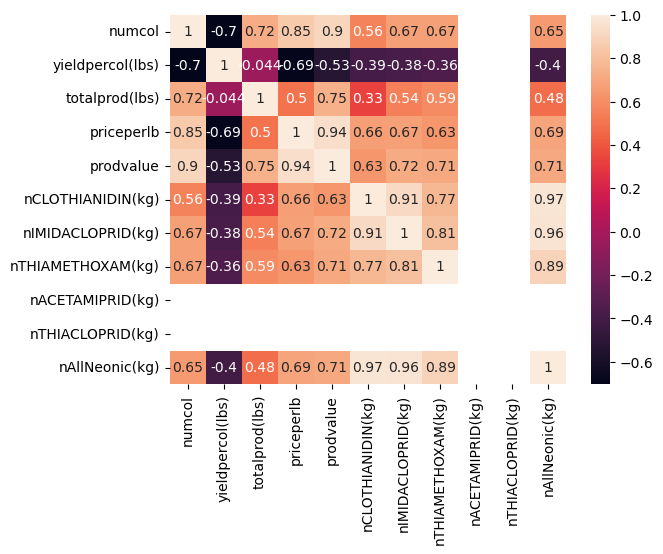

In [49]:
# North Dakota Heatmap
north_dakota_heatmap = sns.heatmap(north_dakota_df.corr(), annot = True);

### **Honey Amount by Year Table and Chart**

In [51]:
# Honey Amount by Year
pivot_honey_amount_by_year_df = pd.pivot_table(honey_df, index = 'year', values = 'totalprod(lbs)', aggfunc = 'sum')
pivot_honey_amount_by_year_df

,totalprod(lbs)
year,
1998,218575000
1999,201747000
2000,218774000
2001,185052000
2002,170313000
2003,180574000
2004,181961000
2005,172790000
2006,153308000


In [53]:
# Honey Amount by Year
pivot_honey_amount_by_year_df = pd.pivot_table(honey_df, index = 'year', values = 'totalprod(lbs)', aggfunc = 'sum')
pivot_honey_amount_by_year_df_descending_order = pivot_honey_amount_by_year_df.sort_values(by = 'totalprod(lbs)', ascending = False)
pivot_honey_amount_by_year_df_descending_order

,totalprod(lbs)
year,
2000,218774000
1998,218575000
1999,201747000
2001,185052000
2004,181961000
2003,180574000
2014,175471000
2010,174524000
2005,172790000


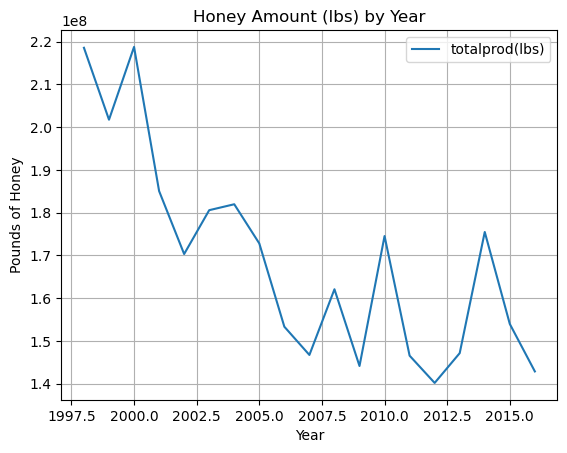

In [55]:
# Honey Amount by Year Line Chart
pivot_honey_amount_by_year_df.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Pounds of Honey')
plt.title('Honey Amount (lbs) by Year')
plt.grid(True)

### **Honey Price by Year Table and Chart**

In [57]:
# Honey Price by Year
pivot_honey_price_by_year_df = pd.pivot_table(honey_df, index = 'year', values = 'prodvalue', aggfunc = 'sum')
pivot_honey_price_by_year_df

,prodvalue
year,
1998,145364000
1999,123145000
2000,130925000
2001,131676000
2002,226245000
2003,250922000
2004,196086000
2005,159107000
2006,156799000


In [59]:
# Honey Price by Year
pivot_honey_price_by_year_df = pd.pivot_table(honey_df, index = 'year', values = 'prodvalue', aggfunc = 'sum')
pivot_honey_price_by_year_df_descending_order = pivot_honey_price_by_year_df.sort_values(by = 'prodvalue', ascending = False)
pivot_honey_price_by_year_df_descending_order

,prodvalue
year,
2014,381288000
2015,319778000
2013,312992000
2016,298709000
2012,277612000
2010,276252000
2011,256257000
2003,250922000
2008,228561000


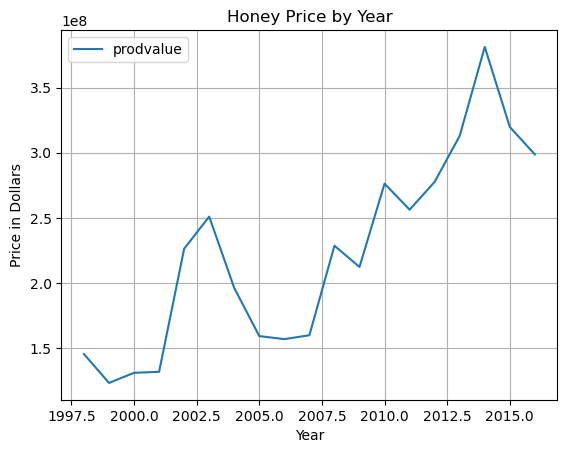

In [61]:
# Honey Price by Year
pivot_honey_price_by_year_df.plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Price in Dollars')
plt.title('Honey Price by Year')
plt.grid(True)

In [63]:
# Honey Dataframe 2
honey_df2 = honey_df.drop(['state', 'stocks(lbs)', 'year', 'statename', 'nACETAMIPRID(kg)', 'nTHIACLOPRID(kg)', 'nTHIAMETHOXAM(kg)', 'priceperlb', 'numcol', 'yieldpercol(lbs)'], axis = 1)
honey_df2

,totalprod(lbs),prodvalue,region,nCLOTHIANIDIN(kg),nIMIDACLOPRID(kg),nAllNeonic(kg)
0,1136000,818000,South,0.0,1836.3,1836.3
1,1156000,647000,South,0.0,1251.2,1251.2
2,1248000,736000,South,0.0,1499.2,1499.2
3,1022000,736000,South,0.0,1490.8,1490.8
4,1032000,1218000,South,0.0,1178.8,2019.2
...,...,...,...,...,...,...
756,2550000,4769000,West,1174.9,277.0,1875.2
757,3102000,6545000,West,840.9,155.9,1523.0
758,2318000,4821000,West,1262.0,258.2,2086.3
759,2926000,5559000,West,0.0,114.4,133.4


### **Honey Amount and Honey Price Scatterplot**

<Axes: xlabel='totalprod(lbs)', ylabel='prodvalue'>

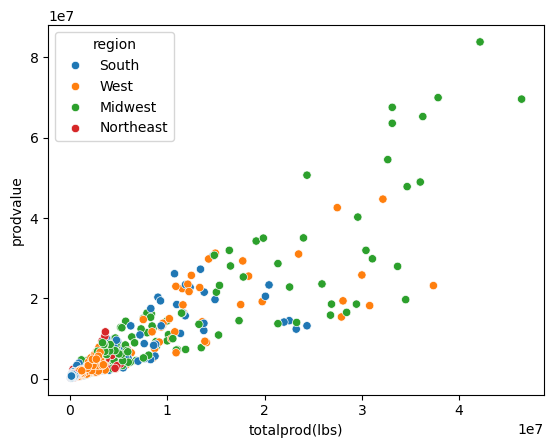

In [65]:
# Honey Dataframe 2 Scatterplot
sns.scatterplot(data = honey_df2, x = 'totalprod(lbs)', y = 'prodvalue', hue = 'region')

### **Honey Dataframe Pairplot**

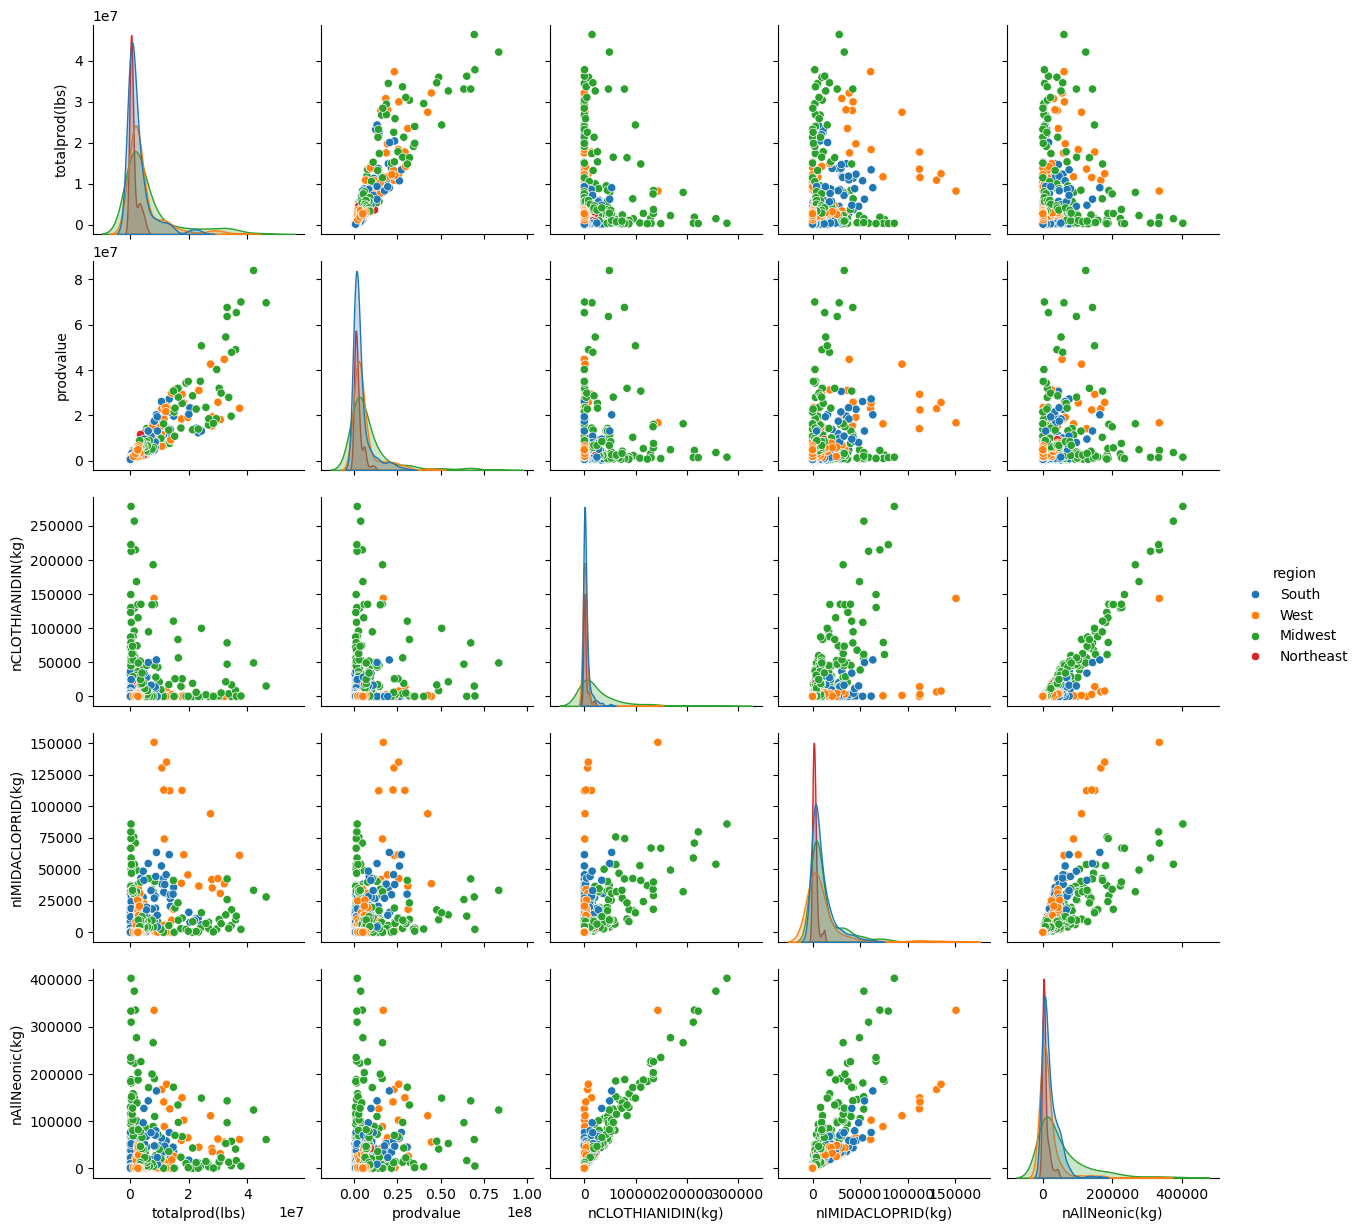

In [67]:
# Honey Dataframe 2 Pairplot
sns.pairplot(honey_df2, hue = 'region')